# 2. Working with Sparse Data

In [4]:
import seaborn as sns
import matplotlib.ticker as ticker
from emotioncf import (
    NNMF_sgd,
    estimate_performance,
    load_toymat,
    create_sparse_mask
)

def plot_mat(mat, vmin=1, vmax=100, cmap='Blues'):
    "Quick helper function to nicely plot a user x item matrix"

    ax = sns.heatmap(mat, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())


In the previous tutorial we saw the basics of how to fit a model, inspect its predictions, and estimate its performance using dense data. In this tutorial we'll see the small differences to keep in mind when working with **sparse** data. 

Like before we'll beging with the `load_toymat` function to generate a samples dataset where **50 users** rated **50 items** on a scale from 1-100. Additionally, we're sparsify this dataset by masking out 25% of the ratings using the `create_sparse_mask` function.

Let's plot the mask below:

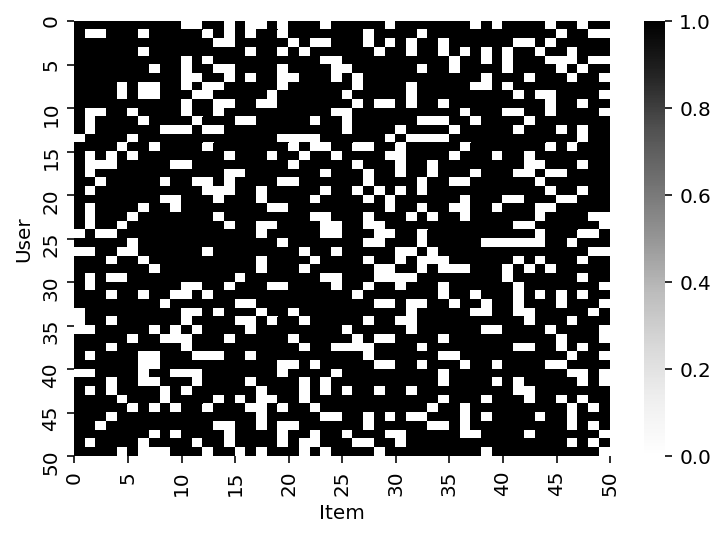

In [6]:
toy_data = load_toymat(users=50, items=50, random_state=0)
mask = create_sparse_mask(toy_data, n_mask_items=.25)
masked_data = toy_data[mask]
plot_mat(mask, vmin=0, vmax=1, cmap='Greys')

# Fitting a model

Just like the previous tutorial we initialize a model with the sparse data, but this time we _omit_ the `mask` and `n_mask_items` arguments. Models are smart enough to realize that the data containing missing values and all future operations will take this into account


In [15]:
model = NNMF_sgd(masked_data, random_state=0)

# Take a look the first 10 user x items. In this case the model's data and masked data are the same
model.data.iloc[:10,:10]

data contains NaNs...treating as pre-masked


Item,0,1,2,3,4,5,6,7,8,9
User,,,,,,,,,,
0,27.440675,35.759468,30.138169,27.244159,21.182740,37.294706,21.879361,44.588650,48.183138,19.172076
1,28.509839,NaN,NaN,5.102241,10.443838,13.065476,NaN,12.664580,23.315539,12.221280
2,33.890827,13.500399,36.759701,48.109427,12.437657,33.807867,29.602097,28.612595,11.154082,47.637451
3,7.472415,43.406303,8.124647,30.777978,6.190999,47.400411,NaN,28.455037,20.359165,3.458350
4,15.589794,34.817174,18.887592,8.980184,1.233936,8.362482,33.969639,22.684842,26.828961,44.833565
5,17.780637,47.021597,38.266263,37.433181,45.185987,9.171122,27.609623,NaN,48.096819,14.607376
6,45.327775,38.702367,16.657258,4.055069,20.362059,16.611707,6.624382,2.671359,36.279718,0.571373
7,32.278512,1.768122,21.520122,25.500843,NaN,39.069626,NaN,NaN,19.633784,47.820286
8,20.062975,46.464571,4.980747,47.265077,NaN,27.708120,NaN,NaN,30.723235,1.653730


Like before we can use `.fit` to train on the observed ratings and generate predictions for the missing values. We can use `.plot_predictions` to inspect the filled-in user-item ratings matrix. However, because we have no ground truth ratings, it's not possible to score the model's predictions or generate a scatter plot like before.

/Users/Esh/Documents/pypackages/emotioncf/emotioncf/base.py:243: UserWarning: Cannot score predictions on missing data because true values were never observed!
  warnings.warn(


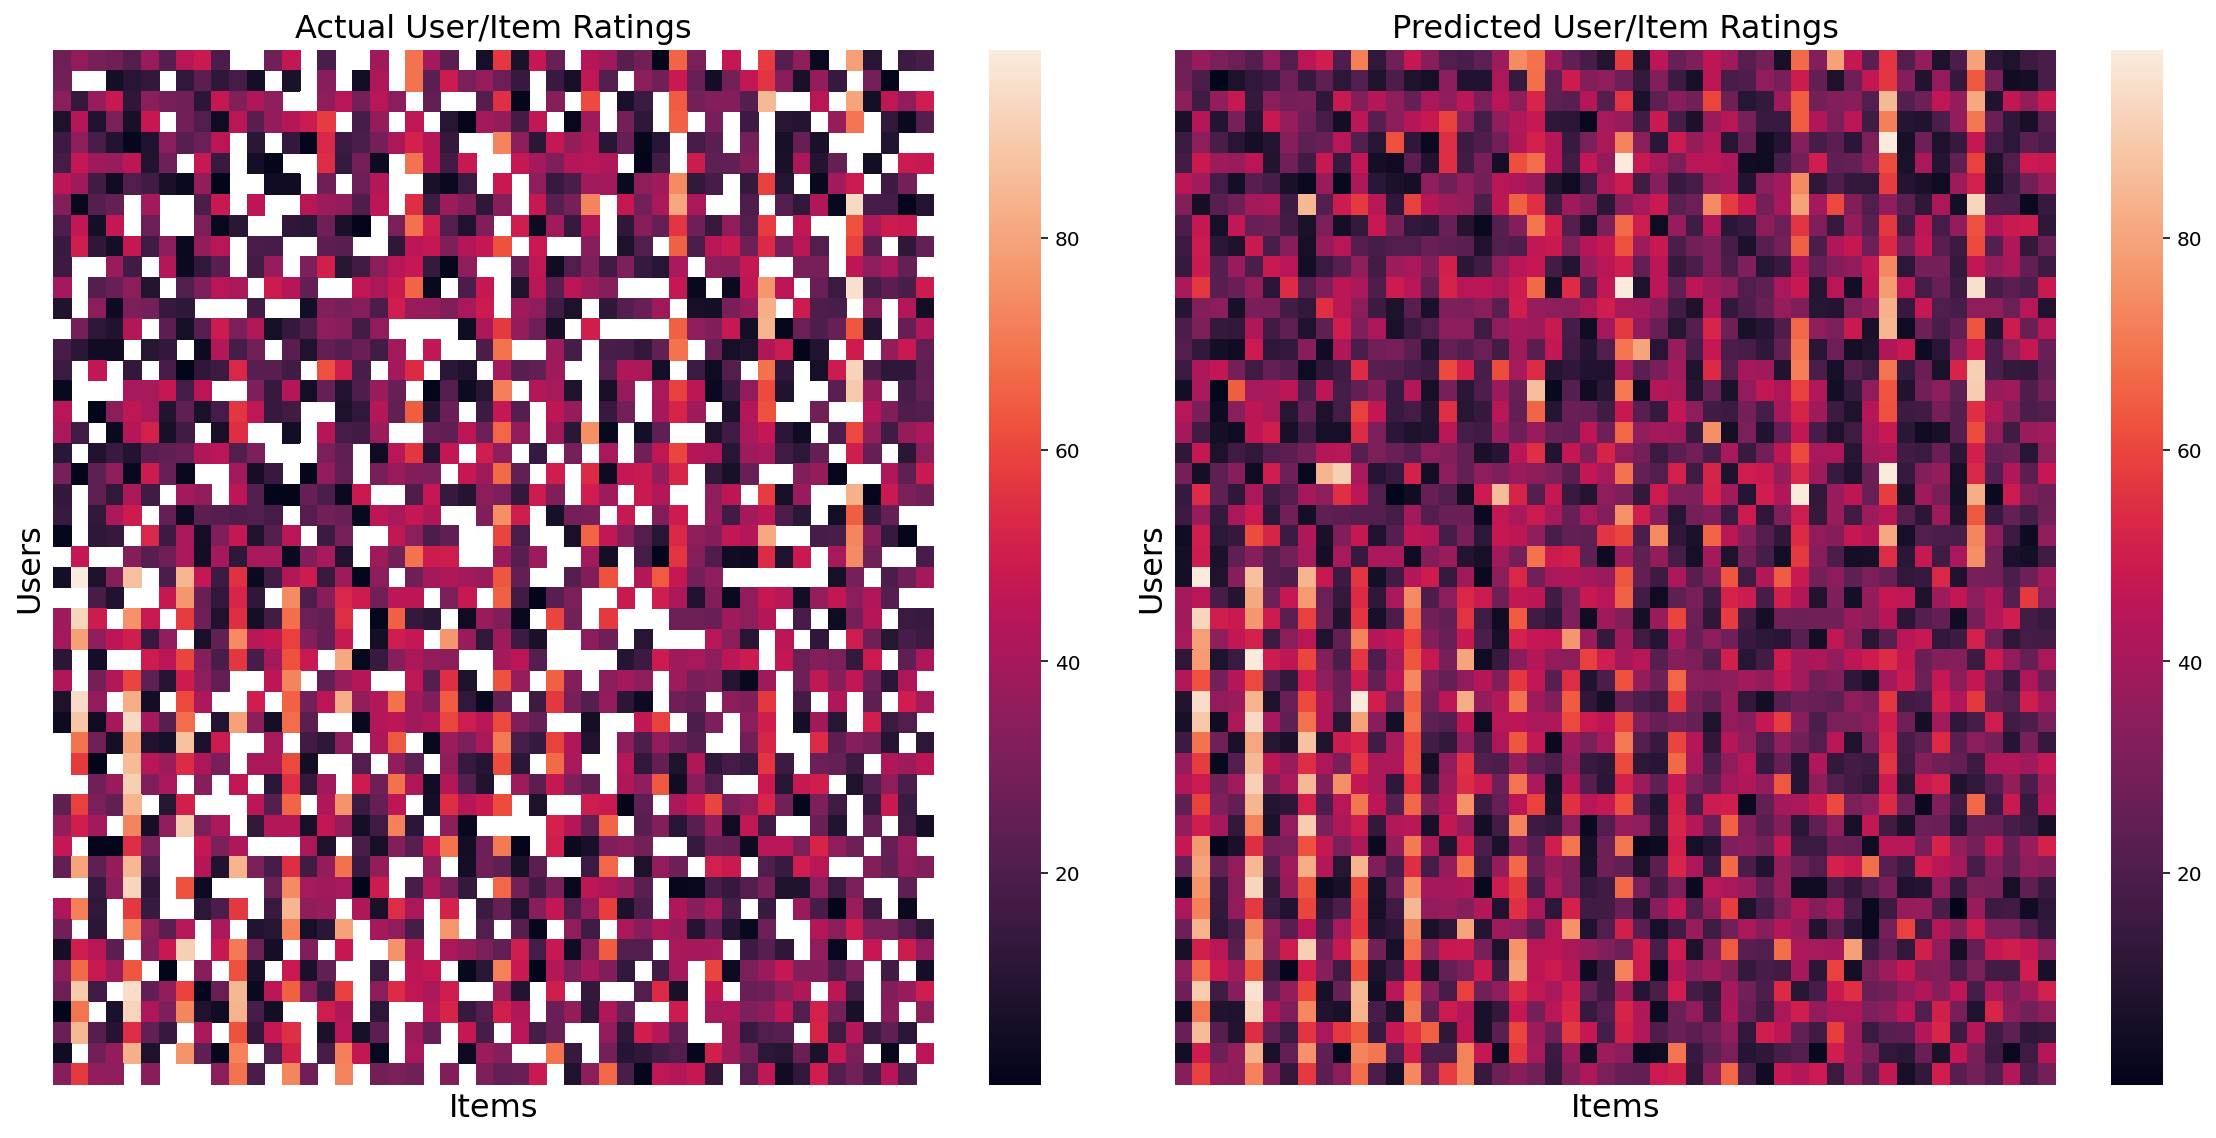

In [16]:
model.fit()
model.plot_predictions();

In [17]:
predictions = model.transform()
# Take a look the first 10 user x item predictions
predictions.iloc[:10,:10]

Item,0,1,2,3,4,5,6,7,8,9
User,,,,,,,,,,
0,27.440675,35.759468,30.138169,27.244159,21.182740,37.294706,21.879361,44.588650,48.183138,19.172076
1,28.509839,19.193658,-0.609682,5.102241,10.443838,13.065476,27.556131,12.664580,23.315539,12.221280
2,33.890827,13.500399,36.759701,48.109427,12.437657,33.807867,29.602097,28.612595,11.154082,47.637451
3,7.472415,43.406303,8.124647,30.777978,6.190999,47.400411,37.153168,28.455037,20.359165,3.458350
4,15.589794,34.817174,18.887592,8.980184,1.233936,8.362482,33.969639,22.684842,26.828961,44.833565
5,17.780637,47.021597,38.266263,37.433181,45.185987,9.171122,27.609623,17.176145,48.096819,14.607376
6,45.327775,38.702367,16.657258,4.055069,20.362059,16.611707,6.624382,2.671359,36.279718,0.571373
7,32.278512,1.768122,21.520122,25.500843,39.659211,39.069626,15.485929,84.756570,19.633784,47.820286
8,20.062975,46.464571,4.980747,47.265077,26.221923,27.708120,17.318159,6.951076,30.723235,1.653730


A model's `.summary` method will now omit scores for "missing" data because no ground truth was ever observed:

In [25]:
model.summary(verbose=True)

User performance results (not returned) are accessible using .user_results
Overall performance results (returned) are accesible using .overall_results


,algorithm,dataset,group,metric,score
0,NNMF_sgd,observed,all,correlation,0.998231
1,NNMF_sgd,observed,all,mae,0.918352
2,NNMF_sgd,observed,all,mse,1.800620
3,NNMF_sgd,observed,all,rmse,1.341872
4,NNMF_sgd,observed,user,correlation,0.997944
5,NNMF_sgd,observed,user,mae,0.918352
6,NNMF_sgd,observed,user,mse,1.800620
7,NNMF_sgd,observed,user,rmse,1.289602


# Benchmarking via Cross-Validation

While we can't assess a model's performance in the absence of ground truth ratings, we can _approximate_ this performance via cross-validation. Our old friend `estimate_performance` is smart enough to understand we're working with sparse data and can perform this kind of approximation. Behind the scenes it works similarily to other libraries like [Surprise](http://surpriselib.com/). A few key caveats are important to note:
- Approximating performance with sparse data works by holding out some of the _observed_ ratings for testing purposes while using the rest of the _observed_ ratings for training purposes. Notice how we're not trying to use the missing ratings to benchmark because that's not possible!
- This has the effect of **increasing** the sparsity of the already sparse data during training. This can be controlled using the `n_folds` parameter. More folds means _less_ additional sparsity. In the example below we use 10 folds which means that 90% of the _observed_ ratings will be using for training the model while 10% of the _observed_ ratings will be used for testing. We can calculate the additional sparsity incurred as follows:
  - 50x50 = 2500 total ratings * 25% sparsity = **1875 observed ratings**
  - 90% * 1875 = **1687 ratings for training**
  - 10% * 1875 = **187 ratings for testing**
  - 1 - (1687 / 2500) = **32.5% effective training sparsity**


In [27]:
overall_results, user_results = estimate_performance(
    NNMF_sgd,
    masked_data,
    n_folds=10,
)
overall_results


Data sparsity is 24.0%. Using cross-validation...


,algorithm,dataset,group,metric,mean,std
0,NNMF_sgd,test,all,correlation,0.364798,0.080220
1,NNMF_sgd,test,all,mae,17.308642,0.882994
2,NNMF_sgd,test,all,mse,468.587220,52.112955
3,NNMF_sgd,test,all,rmse,21.616657,1.205249
4,NNMF_sgd,test,user,correlation,0.272998,0.091077
5,NNMF_sgd,test,user,mae,17.336230,1.176862
6,NNMF_sgd,test,user,mse,468.855204,64.910656
7,NNMF_sgd,test,user,rmse,19.954421,1.357769


Similar to the previous tutorial, we can also see if predictive performance varied by user to identify some users that were particularly difficult to generate predictions for.

In [30]:
user_results.head()

,rmse_test,mse_test,mae_test,correlation_test
user,,,,
0,17.652991,376.946158,15.818702,0.425894
1,21.795164,564.910024,17.555891,0.038531
2,20.349158,457.097971,16.913393,0.238913
3,16.505700,343.458521,13.852083,0.525783
4,21.345487,490.732213,18.725056,-0.352414


# Summary

Fitting a model to sparse data is very similar to working with dense data with the exception that missing ratings have no ground truth for model performance calculation. However, the `estimate_performance` function can be used to approximate performance via cross-validation. This approach is the defacto standard in several other collaborative filtering toolboxes such as [Surprise](http://surpriselib.com/). 

In the [last tutorial](/examples/timeseries-data) we'll see one more feature that's particular useful for working with user ratings that were collected _over time_. 